<a href="https://colab.research.google.com/github/SIIROHI/Assignment-1/blob/main/Rcentralitymeasures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
install.packages('sna')
install.packages('igraph')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘coda’, ‘statnet.common’, ‘network’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/coda_0.19-4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 74239 bytes (72 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [73]:
from google.colab import drive

In [74]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%%R
library(readxl)

In [7]:
%%R
install.packages('readxl')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/readxl_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2056165 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
%%R
hp5edges<- read.table('/content/drive/MyDrive/R, SNA/RP data.txt', header=TRUE)

In [35]:
%%R
library(igraph)
#convert to an igraph network
hp5edgesmat <- as.matrix(hp5edges) #igraph wants our data in matrix format

In [36]:
%%R
hp5net <- graph_from_edgelist(hp5edgesmat, directed=TRUE)

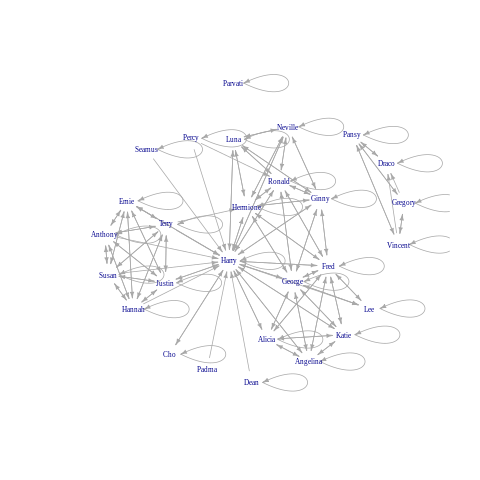

In [37]:
%%R
#extract first names from list of names to make nicer labels. 
##FYI this is insane R notation to extract elements from a list, fear not if you don't get it
firsts <- unlist(lapply(strsplit(V(hp5net)$name,  " "), '[[', 1))
#let's take a look
plot(hp5net, vertex.shape="none", vertex.label.cex=0.6, edge.arrow.size=0.4, vertex.label=firsts, layout=layout.kamada.kawai)

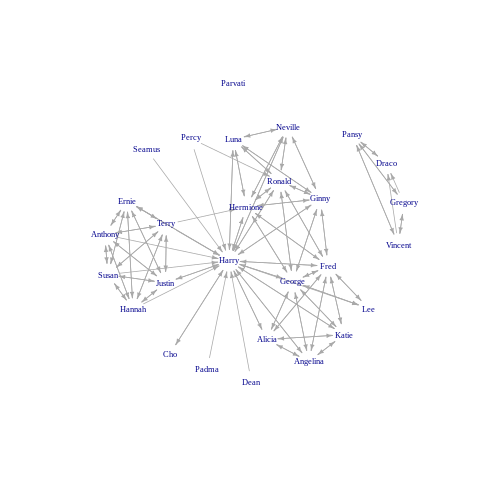

In [38]:
%%R
hp5netsimple <- simplify(hp5net)
plot(hp5netsimple, vertex.shape="none",vertex.label.cex=0.7, edge.arrow.size=0.4, vertex.label=firsts, layout=layout.kamada.kawai)

In [41]:
%%R
degree.cent <- centr_degree(hp5netsimple, mode = "all")
degree.cent$res

 [1] 10 10 18 18 35 10 11 12 11 12 11 12  2  1  4  6 14 15  5 15 10 10  5  5  1
[26]  0  2  1


In [43]:
%%R
closeness.cent <- closeness(hp5netsimple, mode="all")
closeness.cent

        Alicia Spinnet       Angelina Johnson           Fred Weasley 
           0.005586592            0.005586592            0.005714286 
        George Weasley     Harry James Potter             Katie Bell 
           0.005714286            0.006172840            0.005586592 
     Anthony Goldstein        Ernie Macmillan          Hannah Abbott 
           0.005617978            0.005617978            0.005617978 
Justin Finch-Fletchley            Susan Bones             Terry Boot 
           0.005617978            0.005617978            0.005649718 
             Cho Chang            Dean Thomas           Draco Malfoy 
           0.005464481            0.005464481            0.001481481 
       Pansy Parkinson          Ginny Weasley       Hermione Granger 
           0.001481481            0.005649718            0.005681818 
            Lee Jordan         Ronald Weasley          Luna Lovegood 
           0.005524862            0.005681818            0.005586592 
    Neville Longbott

In [45]:
%%R
betweenness(hp5netsimple)

        Alicia Spinnet       Angelina Johnson           Fred Weasley 
                   0.0                    0.0                   16.0 
        George Weasley     Harry James Potter             Katie Bell 
                  16.0                  252.0                    0.0 
     Anthony Goldstein        Ernie Macmillan          Hannah Abbott 
                   0.0                   34.0                    0.0 
Justin Finch-Fletchley            Susan Bones             Terry Boot 
                  34.0                    0.0                    2.5 
             Cho Chang            Dean Thomas           Draco Malfoy 
                   0.0                    0.0                    0.0 
       Pansy Parkinson          Ginny Weasley       Hermione Granger 
                   2.0                    2.5                    5.5 
            Lee Jordan         Ronald Weasley          Luna Lovegood 
                   0.0                    5.5                    0.0 
    Neville Longbott

In [47]:
%%R
degree(hp5netsimple)

        Alicia Spinnet       Angelina Johnson           Fred Weasley 
                    10                     10                     18 
        George Weasley     Harry James Potter             Katie Bell 
                    18                     35                     10 
     Anthony Goldstein        Ernie Macmillan          Hannah Abbott 
                    11                     12                     11 
Justin Finch-Fletchley            Susan Bones             Terry Boot 
                    12                     11                     12 
             Cho Chang            Dean Thomas           Draco Malfoy 
                     2                      1                      4 
       Pansy Parkinson          Ginny Weasley       Hermione Granger 
                     6                     14                     15 
            Lee Jordan         Ronald Weasley          Luna Lovegood 
                     5                     15                     10 
    Neville Longbott